# Autism Prediction
Autism Spectrum Disorder (ASD) prediction involves using machine learning techniques to identify whether an individual is likely to have autism based on a set of features or characteristics. The process typically involves collecting data, preprocessing it, training a model, and evaluating its performance.

![Autism](autism.jpeg)

- Autism Spectrum Disorder (ASD): ASD is a developmental disorder that affects communication, behavior, and social interactions. It is called a "spectrum" because there is a wide range of symptoms and severity.
- Prediction Goal: The aim is to develop a model that can predict whether an individual has ASD based on input features like responses to a questionnaire, demographic data, and other relevant factors.


Autism prediction using machine learning is a promising area that can aid in early detection and intervention. However, it is crucial to handle data carefully, select appropriate models, and evaluate them thoroughly to ensure the predictions are reliable and ethically sound.

### Lets Understand the Features of Data

- ID : ID of the patient
- A1_Score to A10_Score : Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
- age : Age of the patient in years
- gender : Gender of the patient
- ethnicity : Ethnicity of the patient
- jaundice : Whether the patient had jaundice at the time of birth
- autism : Whether an immediate family member has been diagnosed with autism
- contry_of_res : Country of residence of the patient
- used_app_before : Whether the patient has undergone a screening test before
- result : Score for AQ1-10 screening test
- age_desc : Age of the patient
- relation : Relation of patient who completed the test
- Class/ASD : Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade imbalanced-learn

   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ------ --------------------------------- 41.0/258.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("train (3).csv")
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [3]:
df.shape

(800, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


# Data Cleaning

In [6]:
df['gender'].value_counts()

gender
m    530
f    270
Name: count, dtype: int64

In [7]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [8]:
df['jaundice'].value_counts()

jaundice
no     615
yes    185
Name: count, dtype: int64

In [9]:
df['austim'].value_counts()

austim
no     669
yes    131
Name: count, dtype: int64

In [10]:
df['relation'].value_counts()

relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In the above outputs, there is some ambiguity due to the presence of different indicators for unknown or null values, such as ‘?’, ‘others’, and ‘Others’. To standardize, these should all be represented consistently as indicators of missing or unknown data. For clarity, we should use a single indicator, such as ‘Unknown’, to replace all instances of ‘?’, ‘others’, and ‘Others’.

The same is the case with this column so, let’s clean this data, and along with this let’s convert ‘yes’ and ‘no’ to 0 and 1.

we have cleaned the data a bit to derive insights from it

# EDA

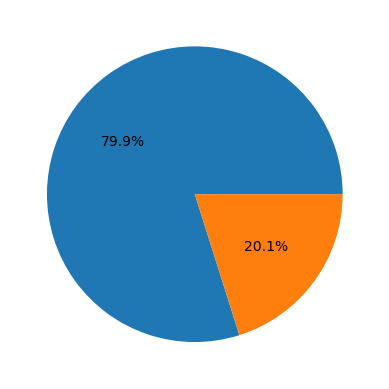

In [11]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%0.1f%%')
plt.show()

The dataset we have is highly imbalanced, which poses a challenge for training our model. If we use this data as-is, the model will struggle to accurately predict the positive class—our primary goal of identifying whether a person has autism. To achieve high accuracy, especially for the positive class, we need to address this imbalance.

The ‘ID’ column will contain a unique value for each of the rows and for the column ‘Class/ASD’ we have already analyzed its distribution so, that is why they have been removed in the above code.

## Numerical Columns

In [12]:
ints = []
objects = []
floats = []

for col in df.columns:
    if np.issubdtype(df[col].dtype, np.integer):
        ints.append(col)
    elif np.issubdtype(df[col].dtype, np.object_):
        objects.append(col)
    elif np.issubdtype(df[col].dtype, np.floating):
        floats.append(col)       

In [13]:
print(ints)

['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Class/ASD']


In [14]:
print(objects)

['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [15]:
print(floats)

['age', 'result']


In [16]:
ints.remove('ID')

In [17]:
ints.remove('Class/ASD')

In [18]:
print(ints)

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']


In [19]:
df['Class/ASD1'] = df['Class/ASD'].apply(str)

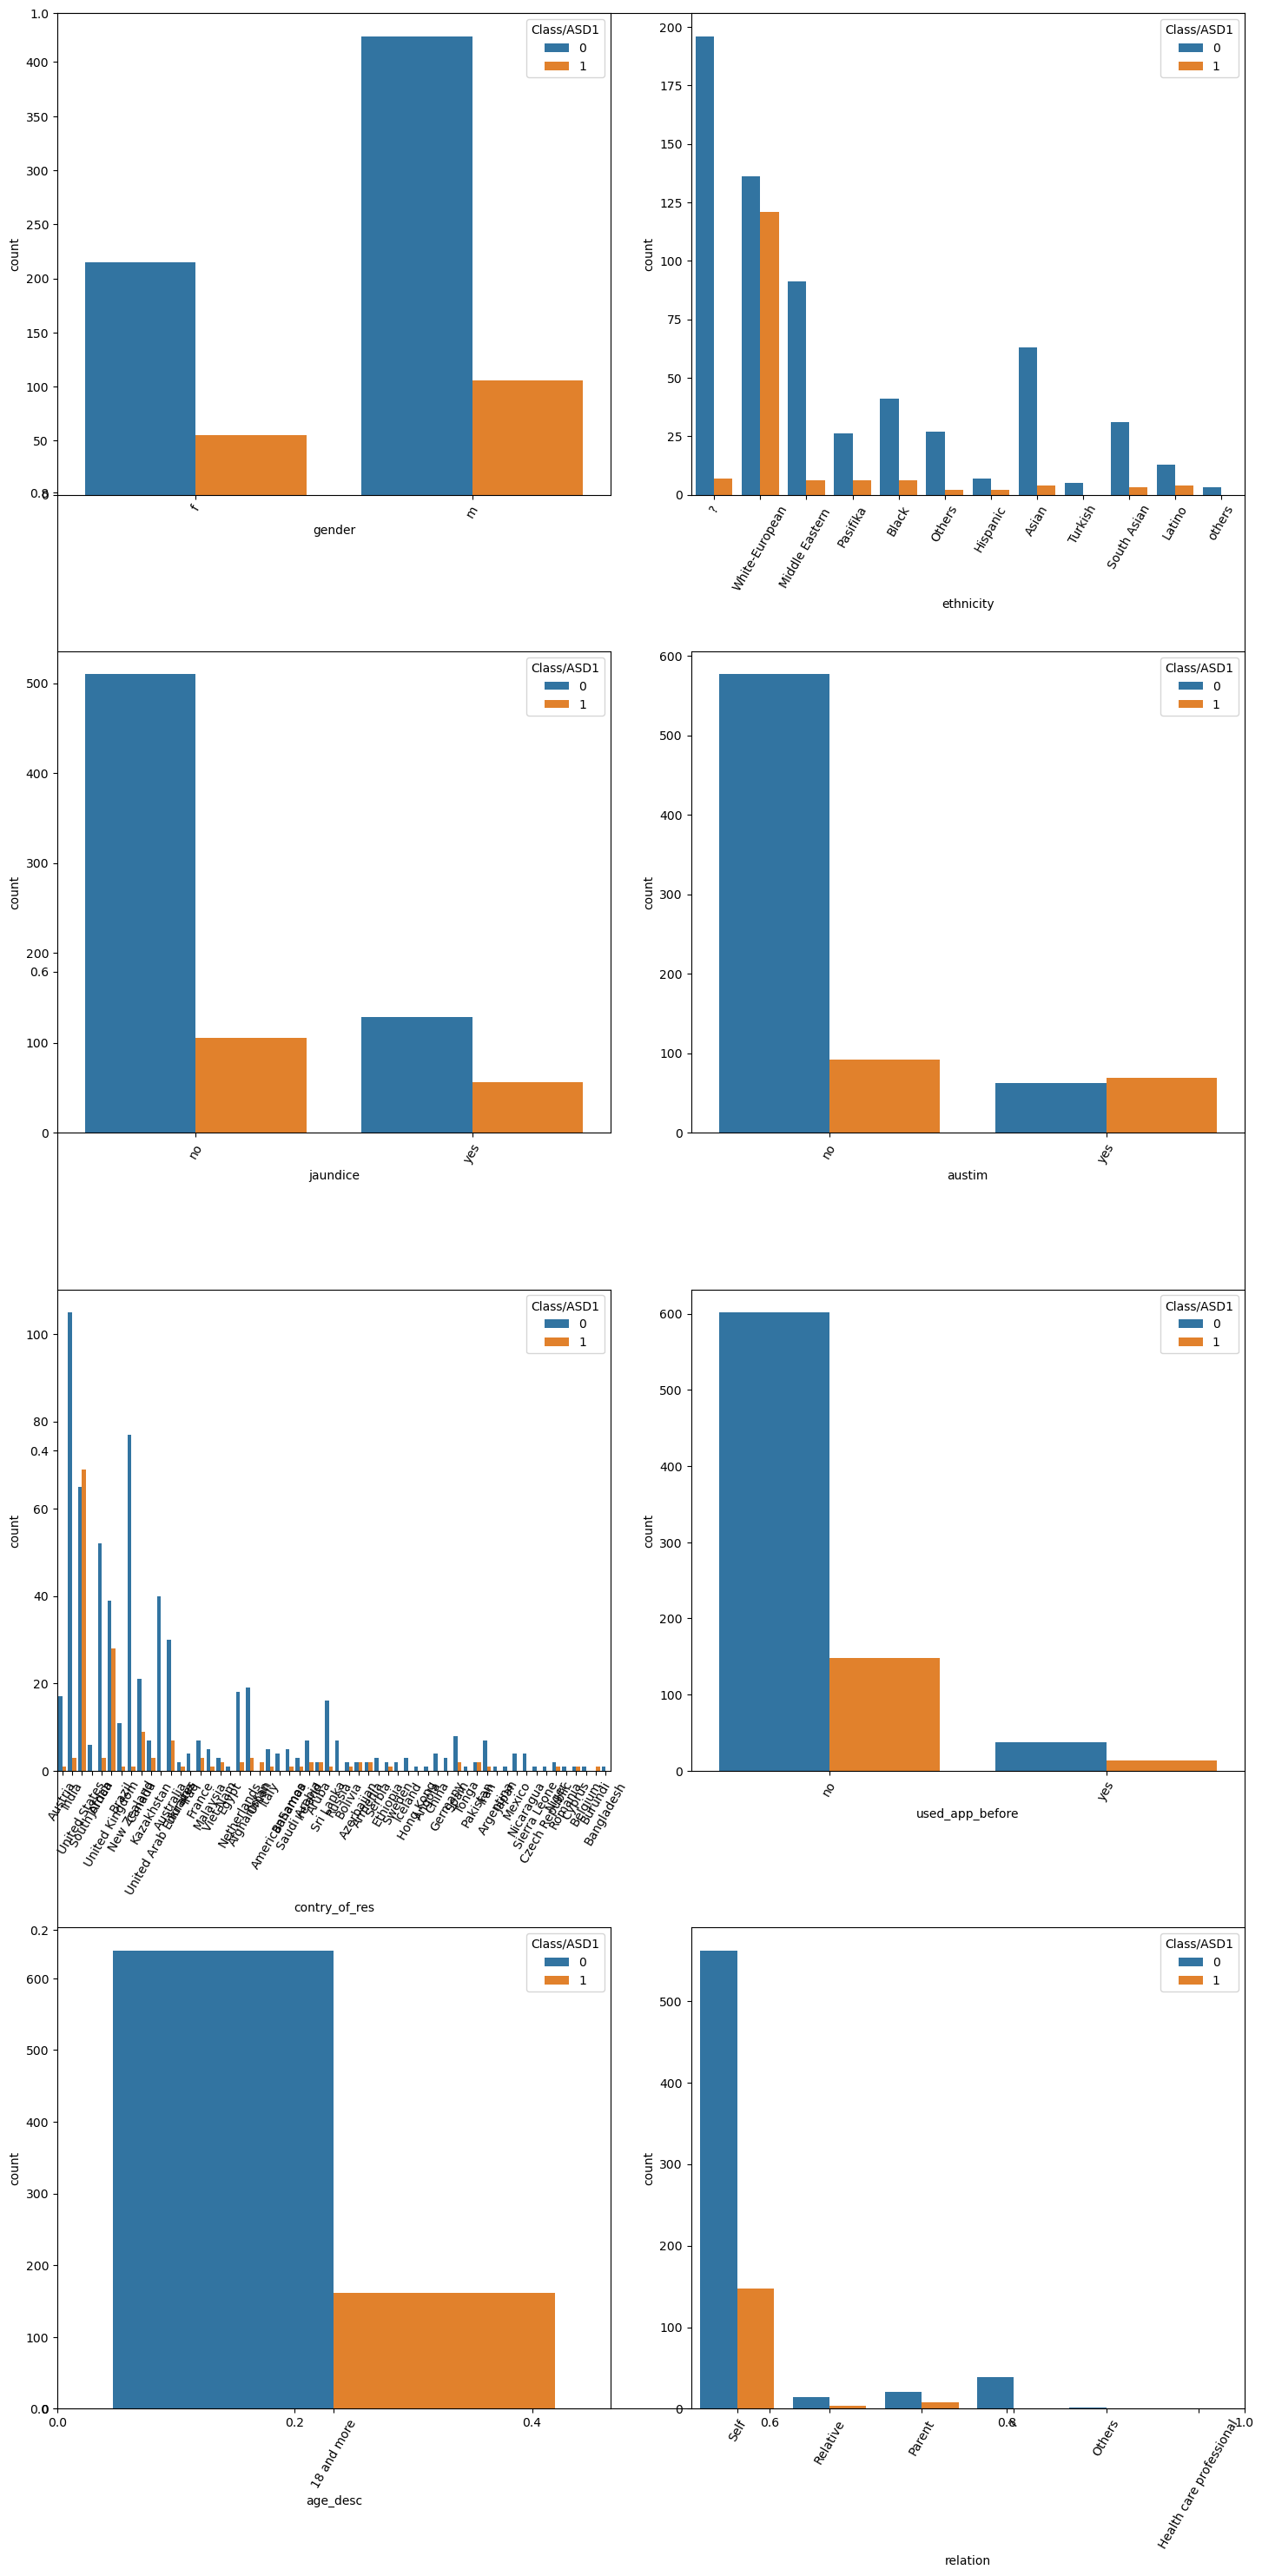

In [20]:
plt.subplots(figsize=(15,30))

for i, col in enumerate(objects):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=col, data=df,hue=df['Class/ASD1'])
    plt.xticks(rotation=60)
    
plt.tight_layout()
plt.show()

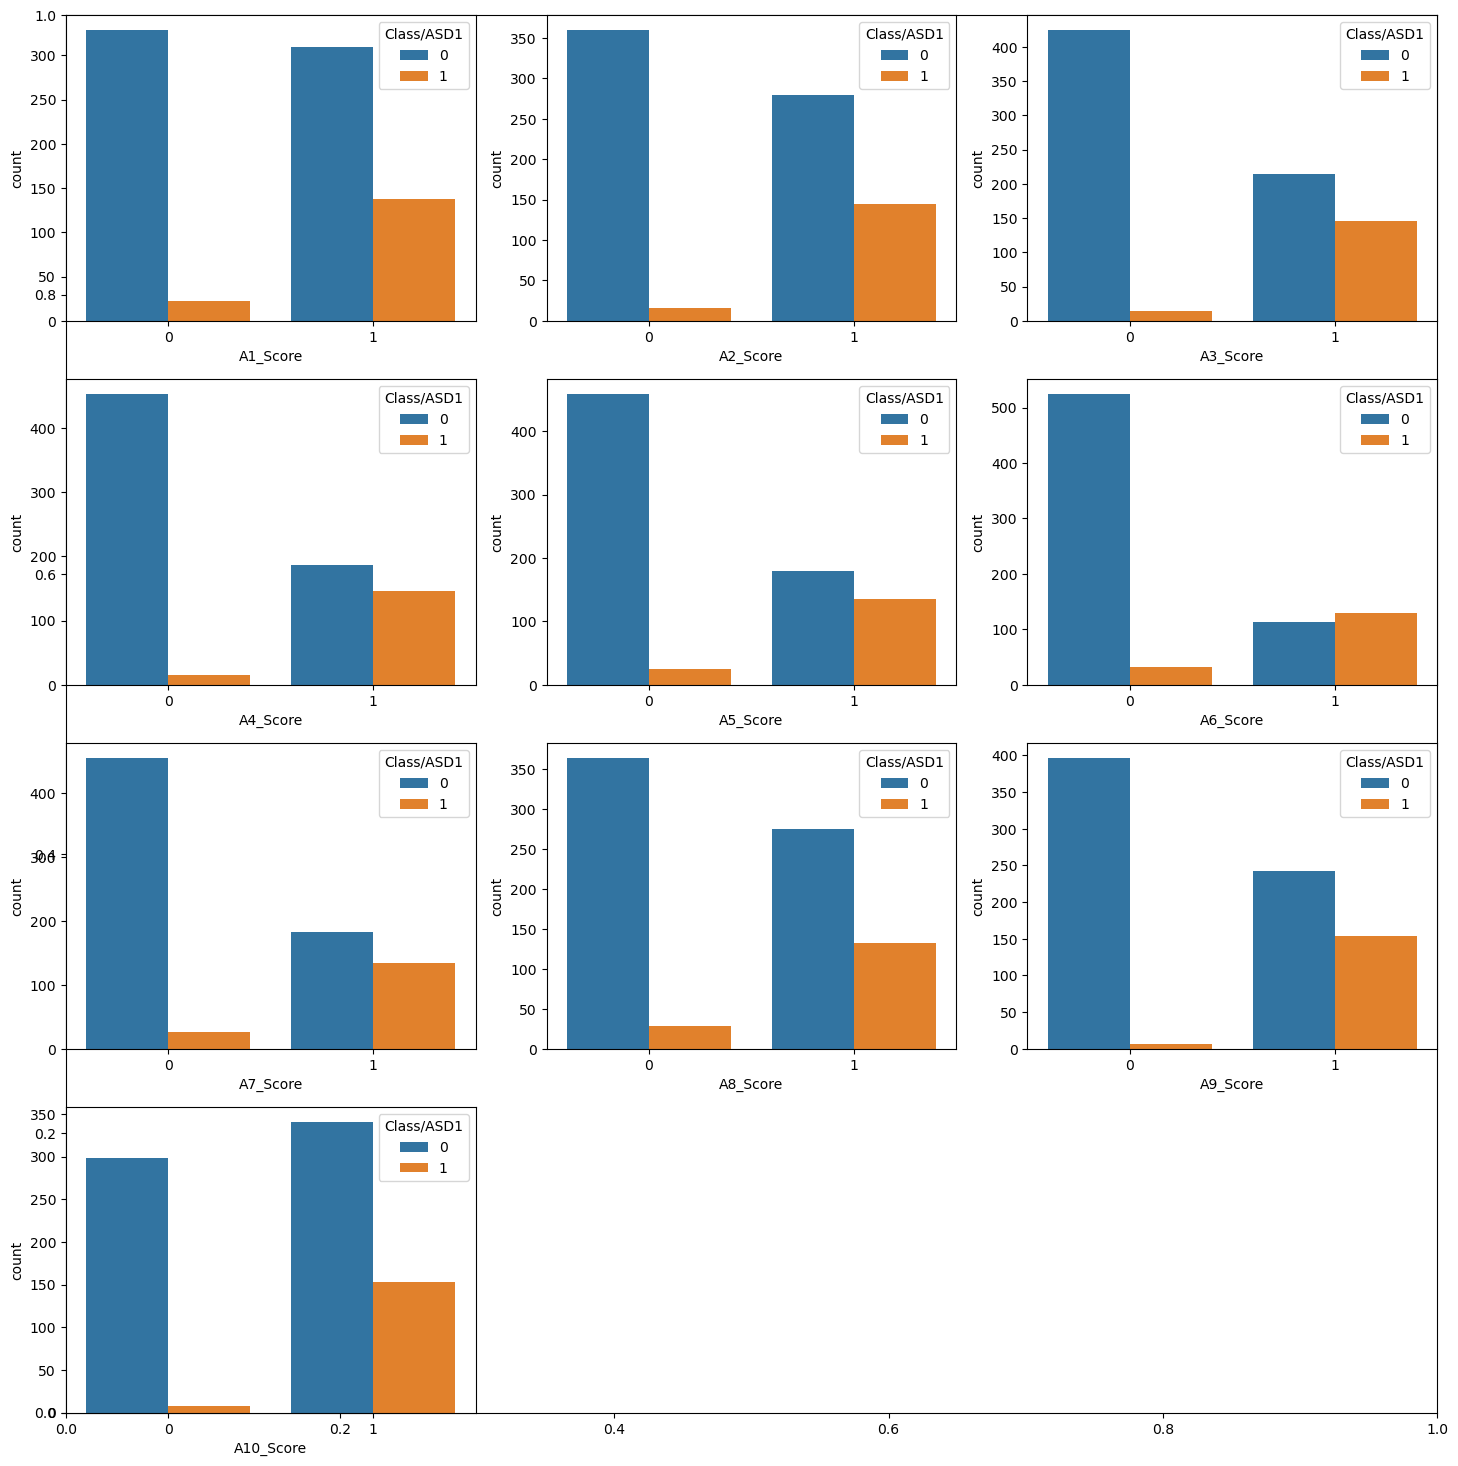

In [21]:
plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
  plt.subplot(4,3,i+1)
  sns.countplot(x=df[col], data=df, hue=df['Class/ASD1'])
plt.tight_layout()
plt.show()

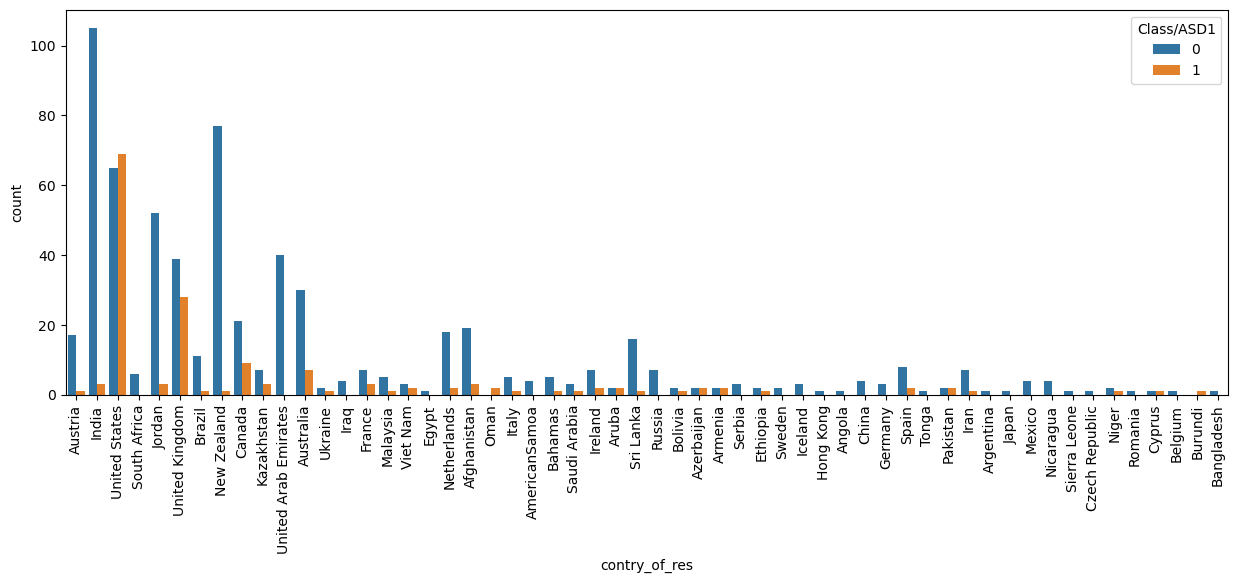

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='contry_of_res', hue='Class/ASD1')
plt.xticks(rotation=90)
plt.show()

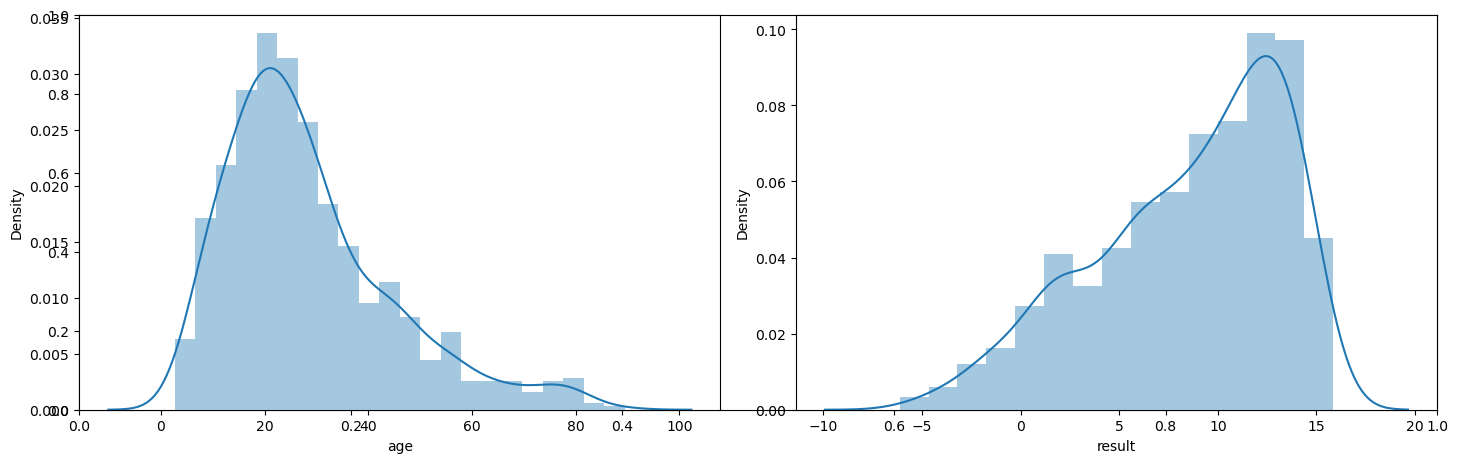

In [23]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
    plt.subplot(1,2,i+1)
    sns.distplot(df[col])

plt.tight_layout()
plt.show()

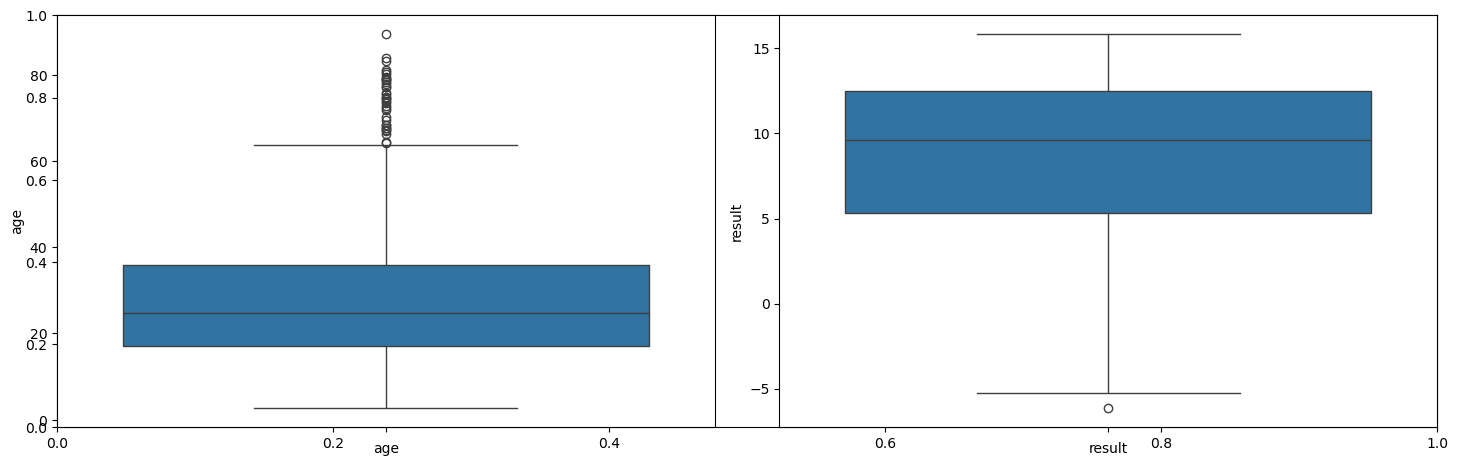

In [24]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sns.boxplot(df[col])  
  plt.xlabel(col)  
plt.tight_layout()
plt.show()

In [25]:
df = df[df['result']>-5]

In [26]:
df.shape

(798, 23)

# feature engineering

In [27]:
def ConvertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

In [28]:
df['AgeGroup'] = df['age'].apply(ConvertAge)

In [29]:
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,Class/ASD1,AgeGroup
0,1,1,0,1,0,1,0,1,0,1,...,no,no,Austria,no,6.351166,18 and more,Self,0,0,Young
1,2,0,0,0,0,0,0,0,0,0,...,no,no,India,no,2.255185,18 and more,Self,0,0,Senior
2,3,1,1,1,1,1,1,1,1,1,...,no,yes,United States,no,14.851484,18 and more,Self,1,1,Kid
3,4,0,0,0,0,0,0,0,0,0,...,no,no,United States,no,2.276617,18 and more,Self,0,0,Young
4,5,0,0,0,0,0,0,0,0,0,...,no,no,South Africa,no,-4.777286,18 and more,Self,0,0,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,no,no,New Zealand,no,12.999501,18 and more,Self,0,0,Teenager
796,797,0,1,1,0,0,1,0,1,1,...,no,no,Cyprus,no,13.561518,18 and more,Self,0,0,Young
797,798,0,0,0,0,0,0,0,0,0,...,yes,no,New Zealand,no,2.653177,18 and more,Self,0,0,Kid
798,799,0,0,0,0,0,0,0,0,0,...,no,no,Canada,no,9.069342,18 and more,Self,0,0,Teenager


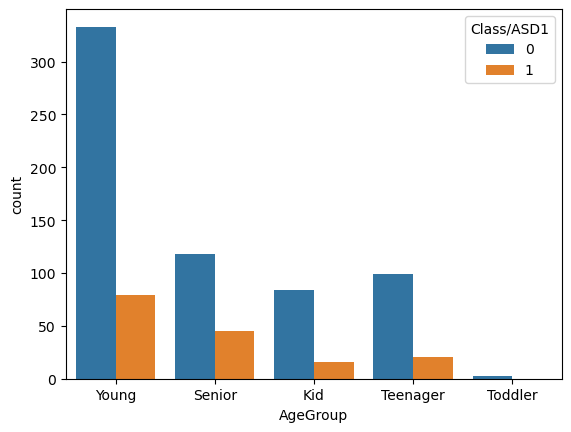

In [30]:
sns.countplot(x=df['AgeGroup'],data=df,hue='Class/ASD1')
plt.show()

we can conclude that the Kid and Toddler group of people have lower chances of having Autism.

In [31]:
def add_features(data):
    #creating a column with all values zero
    data['Sum_score']=0
    for col in data.loc[:,'A1_Score':'A10_Score'].columns:

        #updating the sum_score value with the scores
        data['Sum_score']+= data[col]

    # creating a random data using the below  three columns
    data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

    return data

In [32]:
add_features(df)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,Class/ASD1,AgeGroup,Sum_score,ind
0,1,1,0,1,0,1,0,1,0,1,...,Austria,no,6.351166,18 and more,Self,0,0,Young,6,nonono
1,2,0,0,0,0,0,0,0,0,0,...,India,no,2.255185,18 and more,Self,0,0,Senior,0,nonono
2,3,1,1,1,1,1,1,1,1,1,...,United States,no,14.851484,18 and more,Self,1,1,Kid,10,yesnono
3,4,0,0,0,0,0,0,0,0,0,...,United States,no,2.276617,18 and more,Self,0,0,Young,0,nonono
4,5,0,0,0,0,0,0,0,0,0,...,South Africa,no,-4.777286,18 and more,Self,0,0,Senior,0,nonono
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,New Zealand,no,12.999501,18 and more,Self,0,0,Teenager,3,nonono
796,797,0,1,1,0,0,1,0,1,1,...,Cyprus,no,13.561518,18 and more,Self,0,0,Young,6,nonono
797,798,0,0,0,0,0,0,0,0,0,...,New Zealand,no,2.653177,18 and more,Self,0,0,Kid,0,nonoyes
798,799,0,0,0,0,0,0,0,0,0,...,Canada,no,9.069342,18 and more,Self,0,0,Teenager,0,nonono


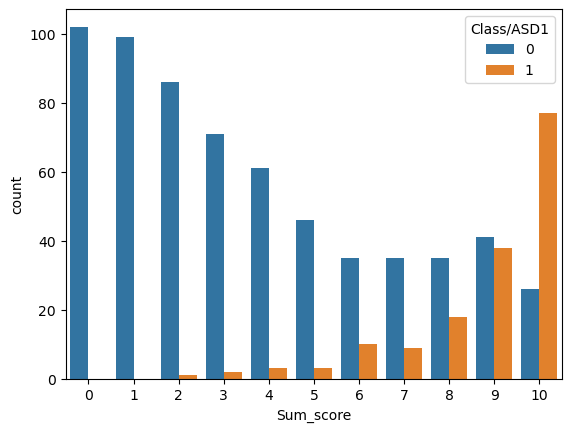

In [33]:
sns.countplot(x=df['Sum_score'],data=df,hue='Class/ASD1')
plt.show()

Higher the sum score higher the chances of having autism is higher as well and similarly for lower sum scores that are for less than 5 it is rare that the person has autism.

In [34]:
#Applying log transformation to remove the skewness of the data
df['age'] = df['age'].apply(lambda x: np.log(x))

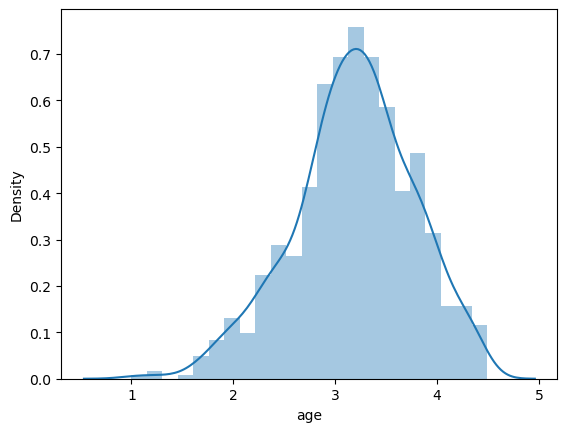

In [35]:
sns.distplot(df['age'])
plt.show()

The skewness of the data has been removed successfully by using the log transformations.

In [36]:
df = df.drop(columns='Class/ASD1')

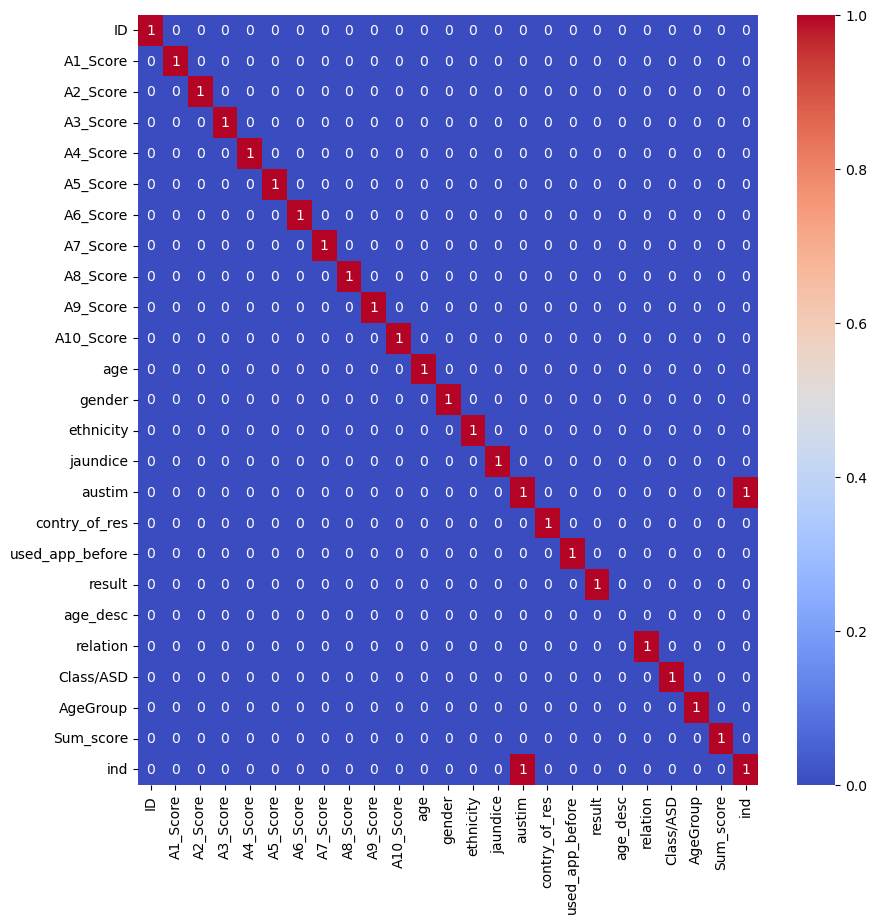

In [37]:
def encode_labels(data):
    for col in data.columns:
      
      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    
    return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()>0.8, annot=True, cbar=True, cmap="coolwarm")
plt.show()

# Model Training

Separating the features and target variables and split them into training and the testing data by using which we will select the model which is performing best on the validation data.

In [38]:
removal = ['ID','age_desc','used_app_before','austim']
features = df.drop(removal + ['Class/ASD'],axis=1)
target = df['Class/ASD']

In [39]:
features

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,contry_of_res,result,relation,AgeGroup,Sum_score,ind
0,1,0,1,0,1,0,1,0,1,1,3.642122,0,0,0,7,6.351166,5,4,6,0
1,0,0,0,0,0,0,0,0,0,0,3.865990,1,0,0,25,2.255185,5,1,0,0
2,1,1,1,1,1,1,1,1,1,1,1.998824,1,10,0,54,14.851484,5,0,10,4
3,0,0,0,0,0,0,0,0,0,0,3.159632,0,0,0,54,2.276617,5,4,0,0
4,0,0,0,0,0,0,0,0,0,0,3.765975,1,0,0,46,-4.777286,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0,1,0,0,0,0,0,0,1,1,2.809233,1,3,0,36,12.999501,5,2,3,0
796,0,1,1,0,0,1,0,1,1,1,3.030279,1,10,0,17,13.561518,5,4,6,0
797,0,0,0,0,0,0,0,0,0,0,1.742478,1,8,1,36,2.653177,5,0,0,1
798,0,0,0,0,0,0,0,0,0,0,2.798153,0,0,0,15,9.069342,5,2,0,0


In [40]:
target

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 798, dtype: int64

In [41]:
x_train,x_val,y_train,y_val = train_test_split(features,target,test_size=0.2,random_state=10)

In [42]:
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
x, y = ros.fit_resample(x_train,y_train)
x.shape,y.shape

((1026, 20), (1026,))

In [43]:
#normalizing features 
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_val = scaler.transform(x_val)

In [44]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [45]:
models = [LogisticRegression(),XGBClassifier(),SVC(kernel='rbf')]

for model in models:
    model.fit(x,y)

    print(f'{model} : ')
    print('Training Accuracy : ',metrics.roc_auc_score(y,model.predict(x)))
    print('Validation Accuracy : ',metrics.roc_auc_score(y_val,model.predict(x_val)))
    print()

LogisticRegression() : 
Training Accuracy :  0.8674463937621832
Validation Accuracy :  0.782258064516129

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.6993727598566308

SVC() : 
Training Accuracy :  0.9376218323586746
Validation Accur

# Model Evaluation

From the above accuracies, we can say that Logistic Regression and SVC() classifier perform better on the validation data with less difference between the validation and training data. Let’s plot the confusion matrix as well for the validation data using the Logistic Regression model.

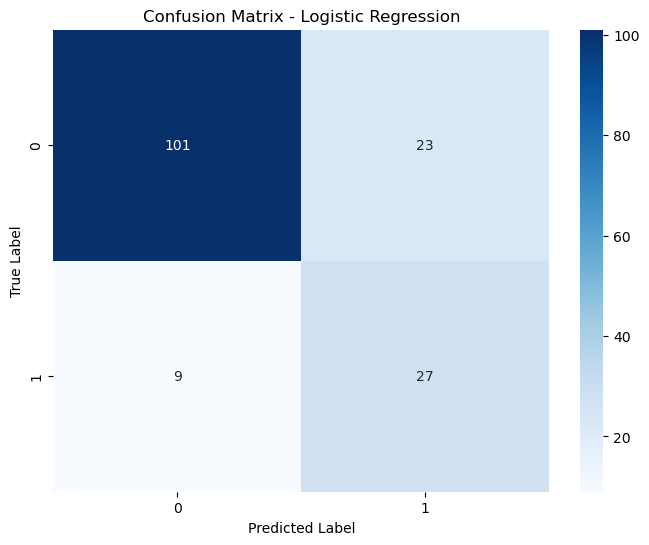

In [56]:
y_pred = models[0].predict(x_val)

#compute the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

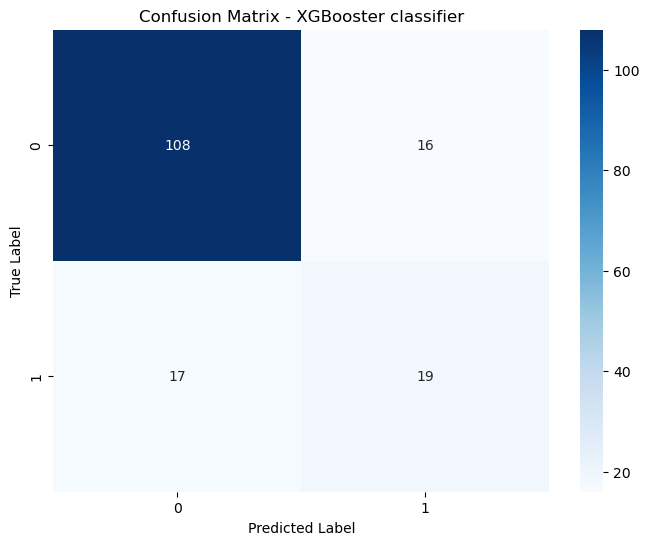

In [57]:
y_pred1 = models[1].predict(x_val)

#compute the confusion matrix
cm = confusion_matrix(y_val, y_pred1)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBooster classifier')
plt.show()

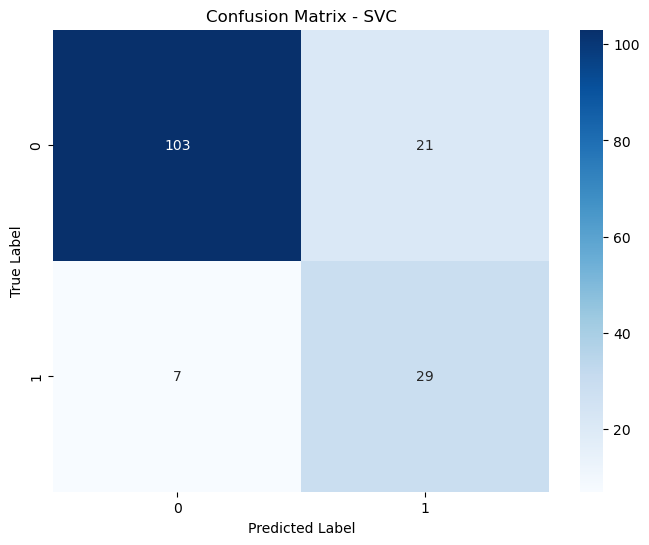

In [58]:
y_pred2 = models[2].predict(x_val)

#compute the confusion matrix
cm = confusion_matrix(y_val, y_pred2)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVC')
plt.show()

In [67]:
from sklearn.metrics import accuracy_score
print(f'Accuracy of Logistic Regression: {accuracy_score(y_pred, y_val)}')
print(f'Accuracy of XGBooster Classifier: {accuracy_score(y_pred1, y_val)}')
print(f'Accuracy of SVC: {accuracy_score(y_pred2, y_val)}')

Accuracy of Logistic Regression: 0.8
Accuracy of XGBooster Classifier: 0.79375
Accuracy of SVC: 0.825


Logistic Regression and SVC performs better than XGBooster with the accuracy nearly 80Percent